<a href="https://colab.research.google.com/github/c-marq/CAP3321C-Data-Wrangling/blob/main/solutions/exercises/exercise_3_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3-1: Create Data Visualizations with Pandas

## 🔑 INSTRUCTOR SOLUTION KEY

**CAP3321C - Data Wrangling**

---

## Overview

In this exercise, you'll create various data visualizations using the mortality dataset. You'll practice creating line plots, area plots, bar plots, histograms, density plots, pie charts, and subplots using Pandas plotting methods and method chaining.

**Instructions:**
1. Run the setup cells to load the data
2. Complete each task by writing code in the provided cells
3. Some tasks are pre-filled - just run them and observe
4. Tasks marked with **YOUR CODE** require you to write the code
5. Use **method chaining** instead of creating new DataFrames

**Group Members:**
- SOLUTION KEY

---

## Setup: Load the Data and Import Libraries

Run these cells to load the data. Do not modify this section.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download the data files from GitHub
!wget -q https://raw.githubusercontent.com/c-marq/CAP3321C-Data-Wrangling/main/data/mortality_prepped.pkl
!wget -q https://raw.githubusercontent.com/c-marq/CAP3321C-Data-Wrangling/main/data/mortality_wide.pkl
print("Data files downloaded successfully!")

Data files downloaded successfully!


In [ ]:
# Load the long format data
mortality_data = pd.read_pickle('mortality_prepped.pkl')
print("Long format data shape:", mortality_data.shape)
mortality_data.head()

Long format data shape: (476, 4)


,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [ ]:
# Load the wide format data
mortality_wide = pd.read_pickle('mortality_wide.pkl')
print("Wide format data shape:", mortality_wide.shape)
mortality_wide.head()

Wide format data shape: (119, 4)


AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


---

## Part 1: Line Plots and Area Plots (Wide Data)

Use the `mortality_wide` DataFrame for Tasks 3-4.

### Task 3: Create a Line Plot for One Age Group (YOUR CODE)

Use the wide data to create a line plot for just the data in the **15-19 age group**. Include an appropriate title on the plot and remove the legend.

**Hint:** Use method chaining with `.set_index()` and `.plot()`

**Example syntax:**
```python
df.set_index('Year')['column_name'].plot(
    title='Your Title',
    legend=False
)
```

**Expected output:** A line plot showing death rates for 15-19 year olds from 1900-2000, with a title and no legend

<Axes: title={'center': 'Mortality Rates for Ages 15-19 (1900-2000)'}, xlabel='Year', ylabel='Deaths per 100K'>

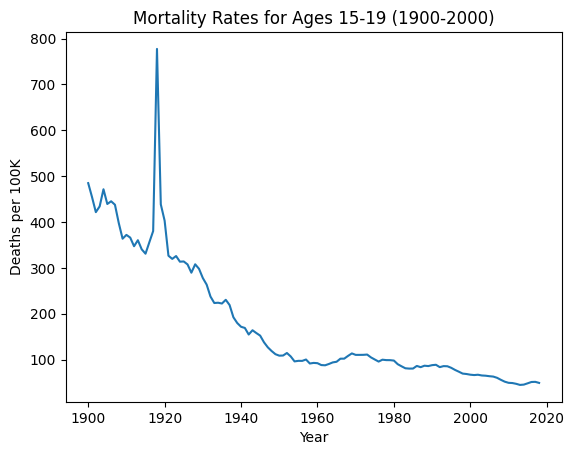

In [ ]:
# ✅ SOLUTION - create line plot for 15-19 age group
mortality_wide['15-19 Years'].plot(
    title='Mortality Rates for Ages 15-19 (1900-2000)',
    legend=False,
    ylabel='Deaths per 100K'
)

#### 📝 Instructor Notes - Task 3

**Common Student Errors:**
- Forgetting to set the index first (plot will use row numbers instead of years)
- Using double brackets `[['15-19 Years']]` which returns a DataFrame instead of Series
- Misspelling the column name (case-sensitive)

**Acceptable Variations:**
- Any reasonable title is fine
- Adding `ylabel` is optional but encouraged
- Using `.plot.line()` instead of `.plot()` is equivalent

### Task 4: Create an Area Plot for All Age Groups (YOUR CODE)

Use the wide data to create an area plot for **all age groups**, and reverse the order of the items in the legend to see how that looks.

**Hint:**
- Use `.plot.area()` for area plots
- To reverse the legend, after plotting run:
```python
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels))
```

**Example syntax:**
```python
df.set_index('Year').plot.area(title='Your Title')
```

**Expected output:** A stacked area plot showing all age groups with reversed legend order

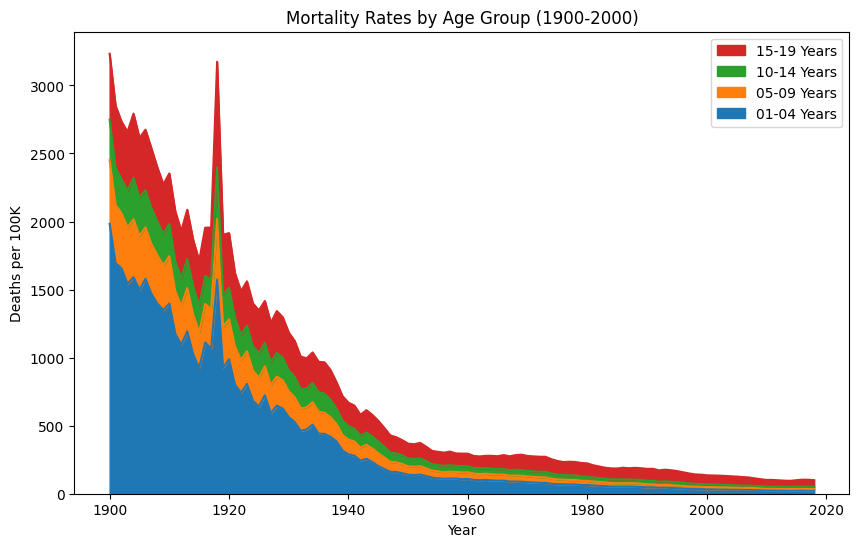

In [ ]:
# ✅ SOLUTION - create area plot for all age groups with reversed legend
mortality_wide.plot.area(
    title='Mortality Rates by Age Group (1900-2000)',
    ylabel='Deaths per 100K',
    figsize=(10, 6)
)

# Reverse the legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(list(reversed(handles)), list(reversed(labels)), loc='upper right')

#### 📝 Instructor Notes - Task 4

**Common Student Errors:**
- Not reversing the legend (partial credit - the plot itself is correct)
- Including Year column in the plot by not setting it as index

**Acceptable Variations:**
- Different methods to reverse legend are all acceptable
- `figsize` is optional
- Legend location can vary

---

## Part 2: Bar Plots (Wide and Long Data)

Tasks 5-7 focus on creating and customizing bar plots.

### Task 5: Create a Bar Plot for Year 1900 (YOUR CODE)

Use the wide data to create a bar plot for all age groups that shows the mortality rates for just the **year 1900**. Note the values on the y-axis.

**Hint:**
- First filter for Year == 1900 using `.query()`
- Set the index and select the age group columns
- Use `.plot.bar()`

**Example syntax:**
```python
df.query('Year == 1900').set_index('Year').plot.bar()
```

**Expected output:** A bar plot showing mortality rates for all age groups in 1900

<Axes: xlabel='Year', ylabel='Deaths per 100K'>

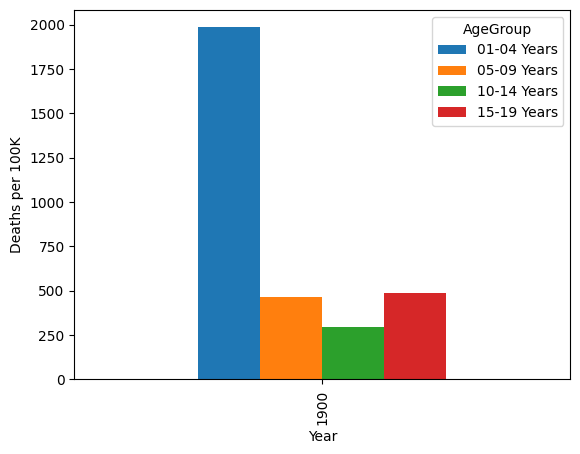

In [ ]:
# ✅ SOLUTION - create bar plot for year 1900
mortality_wide.query('Year == 1900').plot.bar(
    ylabel='Deaths per 100K'
)

# Note: Y-axis should show values up to ~2000 deaths per 100K

#### 📝 Instructor Notes - Task 5

**Key Teaching Point:**
- Have students note the y-axis scale (~0-2000) for comparison with Task 6
- The 01-04 Years group has dramatically higher mortality in 1900

**Common Student Errors:**
- Not filtering for 1900 first
- Forgetting column names (they should check `mortality_wide.columns`)

### Task 6: Create a Bar Plot for Year 2000 (YOUR CODE)

Change the bar plot you created in Task 5 to show the mortality rates for the **year 2000**. Note how the values on the y-axis change. Then, add an appropriate title to the plot and remove the label for the x-axis.

**Hint:**
- Use `xlabel=''` to remove the x-axis label
- Compare the y-axis scale to Task 5

**Example syntax:**
```python
df.query('Year == 2000').set_index('Year').plot.bar(
    title='Your Title',
    xlabel=''
)
```

**Expected output:** A bar plot for year 2000 with title and no x-axis label

<Axes: title={'center': 'Mortality Rates by Age Group (Year 2000)'}, ylabel='Deaths per 100K'>

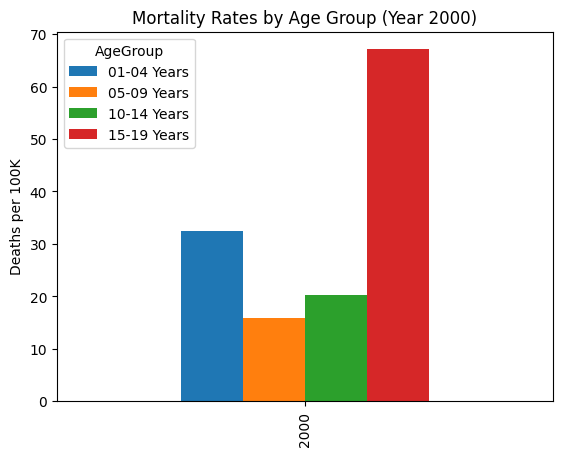

In [ ]:
# ✅ SOLUTION - create bar plot for year 2000 with title, no x-label
mortality_wide.query('Year == 2000').plot.bar(
    title='Mortality Rates by Age Group (Year 2000)',
    xlabel='',
    ylabel='Deaths per 100K'
)

# Note: Y-axis now shows values only up to ~80 deaths per 100K
# This is a dramatic decrease from 1900!

#### 📝 Instructor Notes - Task 6

**Key Teaching Point:**
- Y-axis scale drops from ~2000 to ~80 — a 96% decrease!
- Great discussion opportunity: What caused this? (vaccines, antibiotics, sanitation, nutrition)
- Notice 15-19 now has highest mortality (accidents, not disease)

**Common Student Errors:**
- Forgetting to add title
- Using `xlabel=None` instead of `xlabel=''`

### Task 7: Create a Bar Plot Using Long Data with Pivot (YOUR CODE)

Use the **long data** (`mortality_data`) to create a bar plot like the one in Task 6. To do that, you'll need to chain the `pivot()` method to the `query()` method. Compare the two bar charts, and then make improvements so the plot that uses the long data is easier to read.

**Hint:**
- Use `.pivot(index='col1', columns='col2', values='col3')` to reshape
- Chain methods: query → pivot → plot
- Consider using `rot=0` to make x-axis labels horizontal
- Consider using `figsize=(10, 6)` for better readability

**Example syntax:**
```python
df.query('Year == 2000').pivot(
    index='Year',
    columns='AgeGroup',
    values='DeathRate'
).plot.bar(title='Title', rot=0, figsize=(10, 6))
```

**Expected output:** A bar plot created from long data that matches Task 6 but with improved readability

<Axes: title={'center': 'Mortality Rates by Age Group (Year 2000) - From Long Data'}, ylabel='Deaths per 100K'>

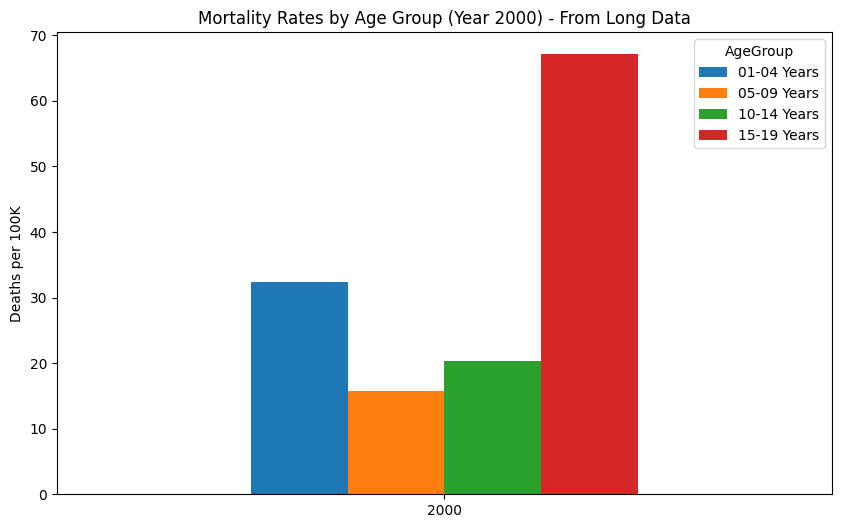

In [ ]:
# ✅ SOLUTION - create bar plot using long data with pivot
mortality_data.query('Year == 2000').pivot(
    index='Year',
    columns='AgeGroup',
    values='DeathRate'
).plot.bar(
    title='Mortality Rates by Age Group (Year 2000) - From Long Data',
    rot=0,
    figsize=(10, 6),
    xlabel='',
    ylabel='Deaths per 100K'
)

#### 📝 Instructor Notes - Task 7

**Key Teaching Point:**
- This demonstrates how pivot() converts long data to wide format for plotting
- The output should match Task 6 visually
- `rot=0` and `figsize` make it more readable

**Common Student Errors:**
- Wrong column names in pivot (AgeGroup, DeathRate, Year)
- Forgetting to chain pivot() before plot()
- Using wrong DataFrame (mortality_wide instead of mortality_data)

---

## Part 3: Histograms and Density Plots (Long Data)

Use the `mortality_data` DataFrame for Tasks 8-9.

### Task 8: Create a Histogram (YOUR CODE)

Use the long data to create a histogram that shows the frequency of the death rates in the **default number of bins**. Then, change the number of bins to **15** to see how this changes the histogram. Does this make it easier to determine the frequency at various datapoints?

**Hint:**
- Use `.plot.hist()` for histograms
- Use the `bins` parameter to change the number of bins

**Example syntax:**
```python
df['DeathRate'].plot.hist(bins=15, title='Title')
```

**Expected output:** Two histograms - one with default bins, one with 15 bins

<Axes: title={'center': 'Distribution of Death Rates (Default Bins)'}, xlabel='Deaths per 100K', ylabel='Frequency'>

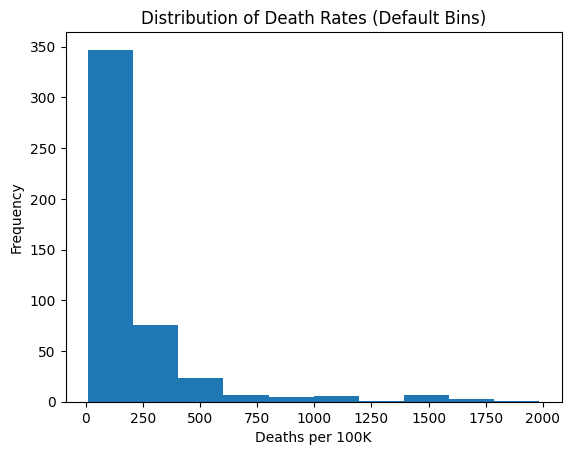

In [ ]:
# ✅ SOLUTION - create histogram with default bins
mortality_data['DeathRate'].plot.hist(
    title='Distribution of Death Rates (Default Bins)',
    xlabel='Deaths per 100K',
    ylabel='Frequency'
)

<Axes: title={'center': 'Distribution of Death Rates (15 Bins)'}, xlabel='Deaths per 100K', ylabel='Frequency'>

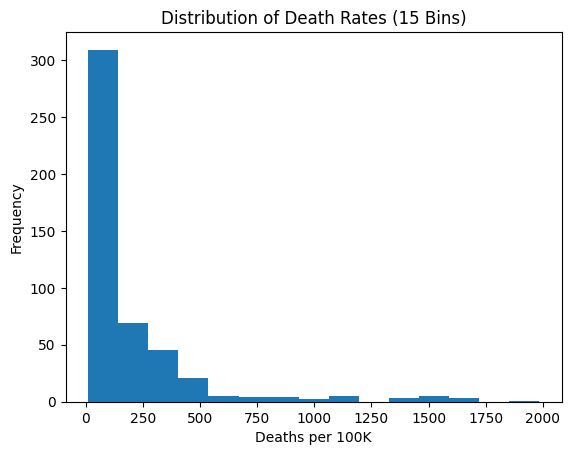

In [ ]:
# ✅ SOLUTION - create histogram with 15 bins
mortality_data['DeathRate'].plot.hist(
    bins=15,
    title='Distribution of Death Rates (15 Bins)',
    xlabel='Deaths per 100K',
    ylabel='Frequency'
)

# Note: More bins = more granular view of distribution
# Can see more detail in where values cluster

#### 📝 Instructor Notes - Task 8

**Key Teaching Point:**
- Default bins (usually 10) vs 15 bins shows different granularity
- More bins = more detail but potentially noisier
- Fewer bins = smoother but may hide patterns

**Discussion Question for Class:**
"Does 15 bins make it easier to determine frequency at various datapoints?" - Answer depends on what you're looking for!

### Task 9: Create a Density Plot (YOUR CODE)

Use the long data to create a density plot that shows the distribution of death rates in the **year 1900**. Include a title and grids in the plot to make the data easier to read.

**Hint:**
- First filter for Year == 1900 using `.query()`
- Use `.plot.kde()` or `.plot.density()` for density plots
- Use `grid=True` to add grid lines

**Example syntax:**
```python
df.query('Year == 1900')['DeathRate'].plot.kde(
    title='Title',
    grid=True
)
```

**Expected output:** A density plot for 1900 death rates with title and grid lines

<Axes: title={'center': 'Distribution of Death Rates in 1900'}, ylabel='Density'>

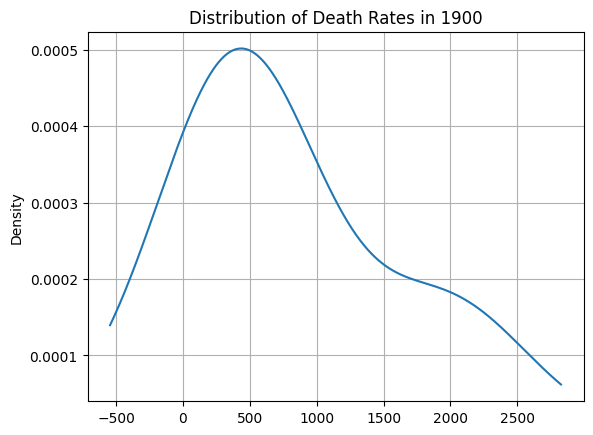

In [ ]:
# ✅ SOLUTION - create density plot for year 1900
mortality_data.query('Year == 1900')['DeathRate'].plot.kde(
    title='Distribution of Death Rates in 1900',
    grid=True,
    xlabel='Deaths per 100K'
)

#### 📝 Instructor Notes - Task 9

**Key Teaching Point:**
- KDE (Kernel Density Estimation) creates smooth distribution curve
- Grid lines help read specific values
- Filtering for 1900 shows the distribution when mortality was high

**Acceptable Variations:**
- `.plot.density()` is equivalent to `.plot.kde()`
- xlabel is optional

---

## Part 4: Pie Charts (Long Data)

Use the `mortality_data` DataFrame for Task 10.

### Task 10: Create a Pie Plot (YOUR CODE)

Use the long data to create a pie plot that shows the sum of the death rates for the years **1900, 1925, 1950, 1975, and 2000**.

**Hint:**
- Filter for specific years using `.query()` with `in` operator
- Group by Year and sum the death rates
- Use `.plot.pie()` for pie charts
- Consider using `autopct='%1.1f%%'` to show percentages
- Consider using `ylabel=''` to remove the y-axis label

**Example syntax:**
```python
df.query('Year in [1900, 1925, 1950, 1975, 2000]').groupby('Year')['DeathRate'].sum().plot.pie(
    title='Title',
    autopct='%1.1f%%',
    ylabel=''
)
```

**Expected output:** A pie chart showing death rate proportions for the 5 selected years

<Axes: title={'center': 'Total Death Rates by Selected Years'}>

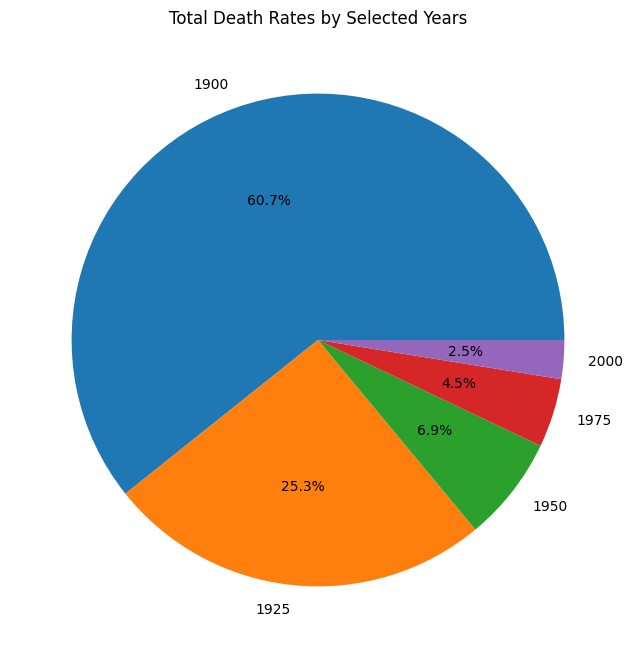

In [ ]:
# ✅ SOLUTION - create pie plot for selected years
mortality_data.query('Year in [1900, 1925, 1950, 1975, 2000]').groupby('Year')['DeathRate'].sum().plot.pie(
    title='Total Death Rates by Selected Years',
    autopct='%1.1f%%',
    ylabel='',
    figsize=(8, 8)
)

#### 📝 Instructor Notes - Task 10

**Key Teaching Point:**
- 1900 dominates the pie chart because death rates were so much higher
- This shows the dramatic improvement in child mortality over the century
- autopct shows percentages on each slice

**Common Student Errors:**
- Forgetting `.groupby('Year')` before `.sum()`
- Using wrong syntax for `in` operator in query
- Not using `ylabel=''` (pie chart shows "DeathRate" label otherwise)

---

## Part 5: Subplots (Long Data)

Use the `mortality_data` DataFrame for Task 11.

### Task 11: Create Subplots (PRE-FILLED)

Create a plot with four subplots in two rows and two columns. The subplots should be horizontal bar charts that show the child mortality rates for each age group for the years **1900, 1925, 1975, and 2000**. Format the subplots so they're easy to read.

This task is more complex, so it's completed for you. **Study the code carefully** to understand how subplots work - you may see this on assessments!

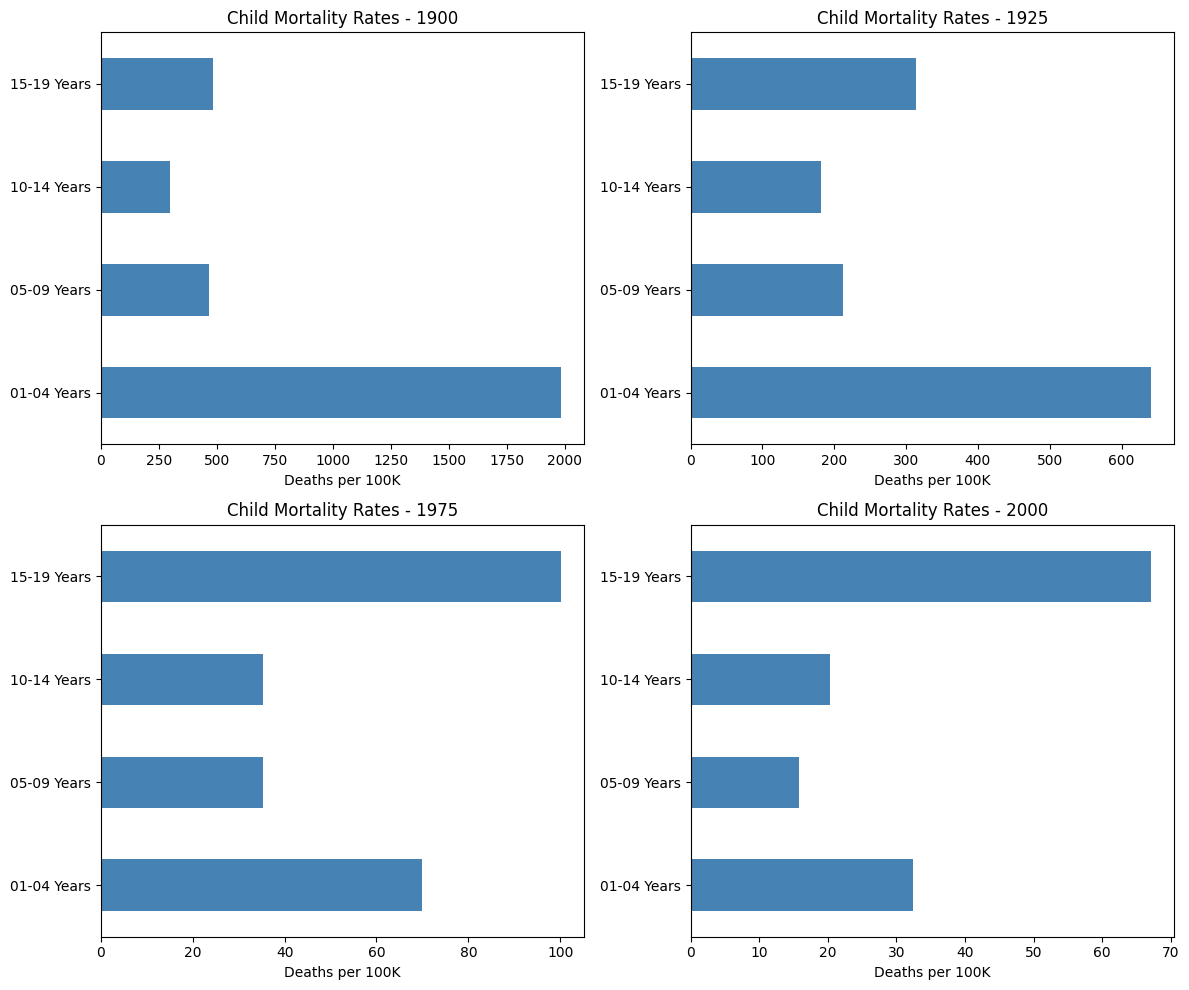

In [ ]:
# PRE-FILLED: Create 2x2 subplots with horizontal bar charts

# Define the years we want to visualize
years = [1900, 1925, 1975, 2000]

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create a horizontal bar chart for each year
for ax, year in zip(axes, years):
    # Filter data for this year and create the plot
    mortality_data.query(f'Year == {year}').set_index('AgeGroup')['DeathRate'].plot.barh(
        ax=ax,
        title=f'Child Mortality Rates - {year}',
        xlabel='Deaths per 100K',
        color='steelblue'
    )
    ax.set_ylabel('')  # Remove y-axis label for cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### 📝 Instructor Notes - Task 11

**Key Teaching Points:**
- `plt.subplots(2, 2)` creates a 2x2 grid of axes
- `axes.flatten()` converts 2D array to 1D for easier iteration
- `ax=ax` parameter tells pandas which subplot to draw on
- `plt.tight_layout()` prevents overlapping labels
- f-strings allow dynamic titles

**Discussion Points:**
- Compare the x-axis scales across years
- 1900 bars extend much further than 2000 bars
- Notice how the age group with highest mortality changes over time

---

## Bonus Challenge (Optional)

If your group finishes early, try this challenge!

### Bonus: Compare Two Decades

Create a side-by-side comparison showing how mortality rates changed between 1900 and 2000 for all age groups. Use any visualization type you think best tells the story.

Consider:
- What changed the most?
- What visualization makes this comparison clearest?
- Can you calculate the percent decrease for each age group?

<Axes: title={'center': 'Mortality Rate Comparison: 1900 vs 2000'}, xlabel='AgeGroup', ylabel='Deaths per 100K'>

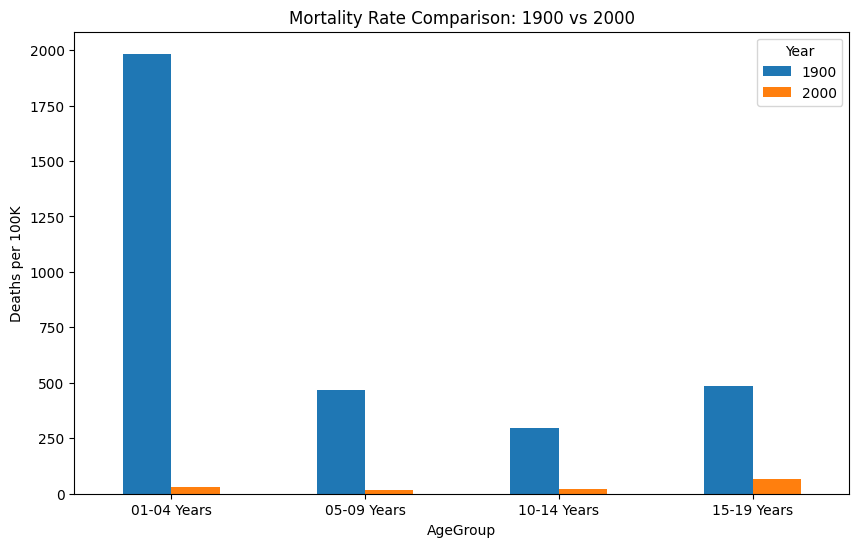

In [ ]:
# ✅ BONUS SOLUTION - Multiple approaches shown

# Approach 1: Grouped bar chart comparing 1900 vs 2000
mortality_data.query('Year in [1900, 2000]').pivot(
    index='AgeGroup',
    columns='Year',
    values='DeathRate'
).plot.bar(
    title='Mortality Rate Comparison: 1900 vs 2000',
    ylabel='Deaths per 100K',
    figsize=(10, 6),
    rot=0
)

In [ ]:
# ✅ BONUS SOLUTION - Calculate percent decrease
comparison = mortality_data.query('Year in [1900, 2000]').pivot(
    index='AgeGroup',
    columns='Year',
    values='DeathRate'
)

comparison['Percent Decrease'] = ((comparison[1900] - comparison[2000]) / comparison[1900] * 100).round(1)
print("Mortality Rate Changes from 1900 to 2000:")
print(comparison)

Mortality Rate Changes from 1900 to 2000:
Year           1900  2000  Percent Decrease
AgeGroup                                   
01-04 Years  1983.8  32.4              98.4
05-09 Years   466.1  15.8              96.6
10-14 Years   298.3  20.3              93.2
15-19 Years   484.8  67.1              86.2


---

## Summary

In this exercise, you practiced creating data visualizations:

**Tasks you completed:**
- Task 3: Line plot for single column with `.plot()` and formatting
- Task 4: Area plot for multiple columns with `.plot.area()`
- Task 5: Bar plot from wide data with `.plot.bar()`
- Task 6: Customizing bar plots with titles and axis labels
- Task 7: Bar plot using `.pivot()` with long data
- Task 8: Histograms with different bin sizes using `.plot.hist()`
- Task 9: Density plots with `.plot.kde()`
- Task 10: Pie charts with `.plot.pie()`

**Tasks that were pre-filled:**
- Task 11: Subplots with `plt.subplots()` - study this for future reference!

**Key Takeaways:**
- Use method chaining instead of creating new DataFrames
- Different plot types are suited for different data stories
- Formatting (titles, labels, grids) makes visualizations more readable
- Wide vs long data formats affect how you structure your plotting code

---

**Submission:** Save this notebook and submit to Canvas before the end of class.